## Ejercicios con Python Tarea Clase 10
### Pablo Ángel Mendoza Aguirre

Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.

In [144]:
import numpy as np
from scipy import optimize
from scipy.stats import gamma
from scipy.stats import erlang
import matplotlib.pyplot as plt

In [ ]:
# Función de aceptación y rechazo
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = np.multiply(R2,t_x)<=f_x
    for i in range(len(R1)):
        if condition[i]:
            plt.plot(R1[i],R2[i]*t_x[i],'ob')
        else:
            plt.plot(R1[i],R2[i]*t_x[i],'o')
    plt.show()

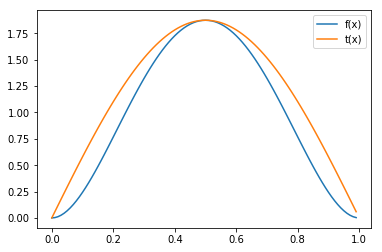

In [4]:
f = lambda x: 30*(x**2 - 2*x**3 +x**4)
c = f(optimize.fmin(lambda x: -f(x),0,disp=False))
a = c
t = lambda x: a*np.sin(np.pi*x)
x = np.arange(0,1,0.01)
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
plt.show() 

2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).

Se tiene que 
$$ y = a \sin(\pi x), \quad -a\leq y\leq a $$
entonces de acuerdo al método de Aceptación-Rechazo, $y$ debe ser integrada en el intervalo [0,1] como se muestra a continuación:
$$ \int_{0}^{1} a \sin(\pi x) dx = a \int_{0}^{1} \sin(\pi x) dx = \frac{a}{\pi} (-\cos(\pi x)) \Big|_{0}^{1} = \frac{a}{\pi} (1 - (-1)) = \frac{2a}{\pi}$$
entonces, este resultante será definido como:
$$c = \int_{0}^{1} a \sin(\pi x) dx = \frac{2a}{\pi}$$
entonces $g(x)$
$$g(x) = \frac{t(x)}{c} = \frac{a \pi \sin(\pi x)}{2 a} = \frac{\pi \sin(\pi x)}{2}$$

3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. 

siguiendo el método de la transformada inversa
$$g(x) = \frac{\pi \sin(\pi x)}{2} = P \longrightarrow \frac{2 P}{\pi} = \sin(\pi x) \longrightarrow \arccos(\frac{2 P}{\pi}) = \pi x $$
finalmente resulta que
$$ x = \frac{\arccos(\frac{2 P}{\pi})}{\pi} $$

para esta ecuación, $\arccos$ esta dado para el intervalo [-1,1], por lo que lo valores de $P$ que cumplen lo anterior son [$\frac{-\pi}{2}$,$\frac{\pi}{2}$]

In [12]:
def distribucion1(a,N):
    return (1/np.pi)*np.arccos((2*np.random.uniform(-np.pi/2,np.pi/2,N))/np.pi)

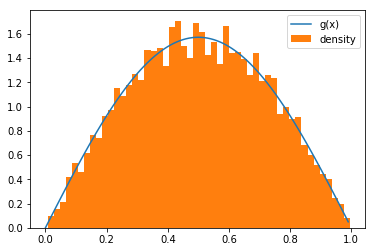

[1.875]


In [13]:
N = 10000
f = lambda x: 30*(x**2 - 2*x**3 +x**4)
c = f(optimize.fmin(lambda x: -f(x),0,disp=False))
a = c
t = lambda x: a*np.sin(np.pi*x)
g = lambda x: (np.pi /2)*np.sin(np.pi * x) 
x = np.arange(0,1,0.01)
R1 = distribucion1(a,N)
plt.plot(x,g(x),label='g(x)')
plt.hist(R1,bins = 50, density = True, label='density')
plt.legend()
plt.show()
print(c)

5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$

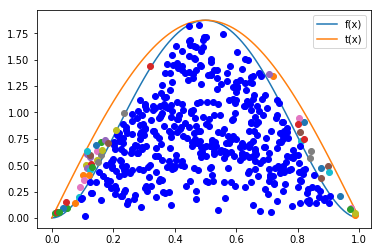

In [141]:
N = 500
f = lambda x: 30*(x**2 - 2*x**3 +x**4)
c = f(optimize.fmin(lambda x: -f(x),0,disp=False))
a = c
t = lambda x: a*np.sin(np.pi*x)
x = np.arange(0,1,0.01)
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
R1 = distribucion1(a,N)
R2 = distribucion1(a,N)
Acep_rechazo(R2,R1,f,t)

6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

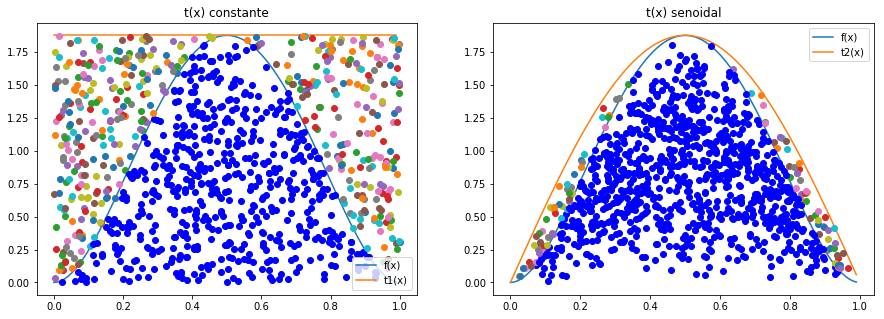

Del total de puntos con t(x) constante, el porcentaje dentro de f(x) fue de:
0.556
Del total de puntos con t(x) constante, el porcentaje dentro de f(x) fue de:
0.894


In [15]:
N = 1000
f = lambda x: 30*(x**2 - 2*x**3 +x**4)
c = f(optimize.fmin(lambda x: -f(x),0,disp=False))
a = c
t1 = lambda x: c*np.ones(len(x))
t2 = lambda x: a*np.sin(np.pi*x)
x = np.arange(0,1,0.01)
plt.figure(figsize=(15,5))
#Primera Gráfica
plt.subplot(1,2,1)
plt.title('t(x) constante')
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t1(x),label='t1(x)')
plt.legend()
R1 = np.random.rand(N)
R2 = np.random.rand(N)
f_x = f(R1)
t1_x = t1(R1)
condicion = np.multiply(R2,t1_x) <= f_x
p1 = 0
p2 = 0
for i in range(N):
    if condicion[i]:
        plt.plot(R1[i],R2[i]*t1_x[i],'ob')
        p1 += 1
    else:
        plt.plot(R1[i],R2[i]*t1_x[i],'o')
        p2 += 1
#Segunda Gráfica
plt.subplot(1,2,2)   
plt.title('t(x) senoidal')
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t2(x),label='t2(x)')
plt.legend()
R3 = distribucion1(a,N)
R4 = distribucion1(a,N)
f_x = f(R3)
t2_x = t2(R3)
condicion = np.multiply(R4,t2_x) <= f_x
p3 = 0
p4 = 0
for i in range(N):
    if condicion[i]:
        plt.plot(R3[i],R4[i]*t2_x[i],'ob')
        p3 += 1
    else:
        plt.plot(R3[i],R4[i]*t2_x[i],'o')
        p4+= 1
plt.show()
print('Del total de puntos con t(x) constante, el porcentaje dentro de f(x) fue de:')
print(p1/N)
print('Del total de puntos con t(x) constante, el porcentaje dentro de f(x) fue de:')
print(p3/N)

Se concluye que el uso de $t(x)$ de tipo senoidal se aproxima más a la curva $f(x)$, más que el uso de una $t(x)$ de tipo constante. Esto se debe a que la senoidal tiene una forma semejante a $f(x)$.

7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

El máximo de f es: [2.109375]


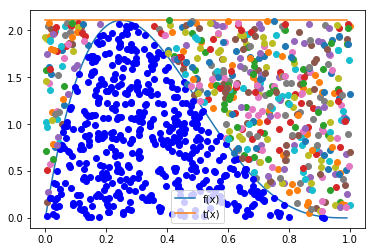

In [203]:
# Ilustración del método de aceptación y rechazo cuando se toma t(x) constante
# Función objetivo 
f = lambda x: 20*x*((1-x)**3)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función constante
t = lambda x: max_f*np.ones(len(x)) # función constante
x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones
print('El máximo de f es:',max_f)
# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
# Validación del método
N = 1000 # número de puntos a simular
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios U~(0,1)
R2 = np.random.rand(N)
R1 = np.random.rand(N)
Acep_rechazo(R2,R1,f,t)

### Notas:

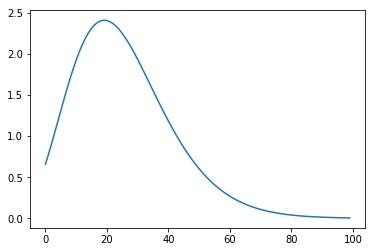

<function matplotlib.pyplot.show(*args, **kw)>

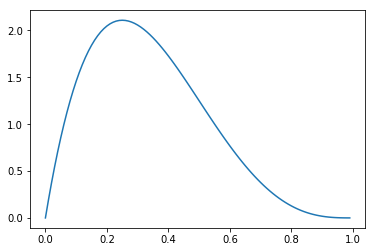

In [219]:
a = 1.99323054838
x = np.linspace(gamma.ppf(0.01, a),gamma.ppf(0.99, a), 100)
z=gamma.pdf(x, 7, loc=-1, scale=.4)
plt.plot(z*6)
plt.show()
x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones
plt.plot(x,f(x),label='f(x)')
plt.show